# Project
## The NSL-KDD Data Set
### 1. Data Files
- **KDDTrain+.txt and KDDTest+.txt**: Full set with attack-type labels and difficulty level in CSV format
- **KDDTrain+.arff and KDDTest+.arff**: Full set with binary labels in ARFF format

## Load the Dataset
### 1. Load binary dataset

In [1]:
# Load ARFF Dataset
import numpy as np
import pandas as pd
from scipy.io.arff import loadarff 
# Train set with binary labels
train_binary_raw_data = loadarff('KDDTrain+.arff')
df_train_binary_labels = pd.DataFrame(train_binary_raw_data[0])
print(df_train_binary_labels.shape)
# Test set with binary labels
test_binary_raw_data = loadarff('KDDTest+.arff')
df_test_binary_labels = pd.DataFrame(test_binary_raw_data[0])
print(df_test_binary_labels.shape)
# change Label
df_train_binary_labels['class'] = np.where(df_train_binary_labels['class'].eq(b'normal'), 0, 1)
df_test_binary_labels['class'] = np.where(df_test_binary_labels['class'].eq(b'normal'), 0, 1)
# Change "class" to "label"
df_train_binary_labels = df_train_binary_labels.rename(columns={"class": "label"})
df_test_binary_labels = df_test_binary_labels.rename(columns={"class": "label"})

print(df_test_binary_labels.head(5))
print(df_train_binary_labels.head(5))

(125973, 42)
(22544, 42)
   duration protocol_type      service     flag  src_bytes  dst_bytes  land  \
0       0.0        b'tcp'   b'private'   b'REJ'        0.0        0.0  b'0'   
1       0.0        b'tcp'   b'private'   b'REJ'        0.0        0.0  b'0'   
2       2.0        b'tcp'  b'ftp_data'    b'SF'    12983.0        0.0  b'0'   
3       0.0       b'icmp'     b'eco_i'    b'SF'       20.0        0.0  b'0'   
4       1.0        b'tcp'    b'telnet'  b'RSTO'        0.0       15.0  b'0'   

   wrong_fragment  urgent  hot  ...  dst_host_srv_count  \
0             0.0     0.0  0.0  ...                10.0   
1             0.0     0.0  0.0  ...                 1.0   
2             0.0     0.0  0.0  ...                86.0   
3             0.0     0.0  0.0  ...                57.0   
4             0.0     0.0  0.0  ...                86.0   

  dst_host_same_srv_rate  dst_host_diff_srv_rate  dst_host_same_src_port_rate  \
0                   0.04                    0.06                

### 2. Load multi-labels dataset

In [2]:
col_names = ["duration","protocol_type","service","flag","src_bytes",
    "dst_bytes","land","wrong_fragment","urgent","hot","num_failed_logins",
    "logged_in","num_compromised","root_shell","su_attempted","num_root",
    "num_file_creations","num_shells","num_access_files","num_outbound_cmds",
    "is_host_login","is_guest_login","count","srv_count","serror_rate",
    "srv_serror_rate","rerror_rate","srv_rerror_rate","same_srv_rate",
    "diff_srv_rate","srv_diff_host_rate","dst_host_count","dst_host_srv_count",
    "dst_host_same_srv_rate","dst_host_diff_srv_rate","dst_host_same_src_port_rate",
    "dst_host_srv_diff_host_rate","dst_host_serror_rate","dst_host_srv_serror_rate",
    "dst_host_rerror_rate","dst_host_srv_rerror_rate","label", "difficulty_level"]

df_train_multiple_labels = pd.read_csv("KDDTrain+.txt", header=None, names = col_names)
df_test_multiple_labels = pd.read_csv("KDDTest+.txt", header=None, names = col_names)

print(df_train_multiple_labels.shape)
print(df_test_multiple_labels.shape)
print(df_train_multiple_labels.head(1))

(125973, 43)
(22544, 43)
   duration protocol_type   service flag  src_bytes  dst_bytes  land  \
0         0           tcp  ftp_data   SF        491          0     0   

   wrong_fragment  urgent  hot  ...  dst_host_same_srv_rate  \
0               0       0    0  ...                    0.17   

   dst_host_diff_srv_rate  dst_host_same_src_port_rate  \
0                    0.03                         0.17   

   dst_host_srv_diff_host_rate  dst_host_serror_rate  \
0                          0.0                   0.0   

   dst_host_srv_serror_rate  dst_host_rerror_rate  dst_host_srv_rerror_rate  \
0                       0.0                  0.05                       0.0   

    label  difficulty_level  
0  normal                20  

[1 rows x 43 columns]


## Overview of datasets
### 1. Binary labels dataset

In [3]:
df_train_binary_labels.describe()

,duration,src_bytes,dst_bytes,wrong_fragment,urgent,hot,num_failed_logins,num_compromised,root_shell,su_attempted,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,label
count,125973.00000,1.259730e+05,1.259730e+05,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,...,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000
mean,287.14465,4.556674e+04,1.977911e+04,0.022687,0.000111,0.204409,0.001222,0.279250,0.001342,0.001103,...,115.653005,0.521242,0.082951,0.148379,0.032542,0.284452,0.278485,0.118832,0.120240,0.465417
std,2604.51531,5.870331e+06,4.021269e+06,0.253530,0.014366,2.149968,0.045239,23.942042,0.036603,0.045154,...,110.702741,0.448949,0.188922,0.308997,0.112564,0.444784,0.445669,0.306557,0.319459,0.498805
min,0.00000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.00000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,10.000000,0.050000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.00000,4.400000e+01,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,63.000000,0.510000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.00000,2.760000e+02,5.160000e+02,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,255.000000,1.000000,0.070000,0.060000,0.020000,1.000000,1.000000,0.000000,0.000000,1.000000
max,42908.00000,1.379964e+09,1.309937e+09,3.000000,3.000000,77.000000,5.000000,7479.000000,1.000000,2.000000,...,255.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### 2. Multiple labels dataset

In [4]:
df_train_multiple_labels.describe()

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,difficulty_level
count,125973.00000,1.259730e+05,1.259730e+05,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,...,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000
mean,287.14465,4.556674e+04,1.977911e+04,0.000198,0.022687,0.000111,0.204409,0.001222,0.395736,0.279250,...,115.653005,0.521242,0.082951,0.148379,0.032542,0.284452,0.278485,0.118832,0.120240,19.504060
std,2604.51531,5.870331e+06,4.021269e+06,0.014086,0.253530,0.014366,2.149968,0.045239,0.489010,23.942042,...,110.702741,0.448949,0.188922,0.308997,0.112564,0.444784,0.445669,0.306557,0.319459,2.291503
min,0.00000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.00000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,10.000000,0.050000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.000000
50%,0.00000,4.400000e+01,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,63.000000,0.510000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,20.000000
75%,0.00000,2.760000e+02,5.160000e+02,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,255.000000,1.000000,0.070000,0.060000,0.020000,1.000000,1.000000,0.000000,0.000000,21.000000
max,42908.00000,1.379964e+09,1.309937e+09,1.000000,3.000000,3.000000,77.000000,5.000000,1.000000,7479.000000,...,255.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,21.000000


## Data preprocessing 
### 1. Binary labels
- LabelEncoder
- OneHotEncoder

In [5]:
from sklearn.preprocessing import LabelEncoder,OneHotEncoder

pd.set_option('display.max_columns', None)

# Combine training dataset with testing dataset to apply One-Hot-Encoder
df_binary_labels = pd.concat([df_train_binary_labels, df_test_binary_labels], ignore_index=True)

# One-Hot_Encoder for "protocol_type","service","flag"
categorical_col = ["protocol_type","service","flag"]
for col in categorical_col:
    df_dummies = pd.get_dummies(df_binary_labels[col], prefix=col+"_")
    df_binary_labels = df_binary_labels.drop(col, axis=1)
    df_binary_labels = pd.concat([df_binary_labels,df_dummies], axis=1)

# Handle byte value of "land", "logged_in", "is_host_login", "is_guest_login"
byte_value_col = ["land", "logged_in", "is_host_login", "is_guest_login"]
for col in byte_value_col:
    df_binary_labels[col] = np.where(df_binary_labels[col].eq(b'0'), 0, 1)
print(df_binary_labels.shape)
df_binary_labels_normal = df_binary_labels.loc[df_binary_labels["label"]==0]
df_binary_labels_anomaly = df_binary_labels.loc[df_binary_labels["label"]==1]
print(df_binary_labels_normal.shape)
print(df_binary_labels_anomaly.shape)

(148517, 123)
(77054, 123)
(71463, 123)


### 2. Multiple labels
- LabelEncoder
- OneHotEncoder

In [6]:
# Combine training dataset with testing dataset to apply One-Hot-Encoder
df_multiple_labels = pd.concat([df_train_multiple_labels, df_test_multiple_labels], ignore_index=True)
# Drop "difficulty_level"
df_multiple_labels = df_multiple_labels.drop("difficulty_level", axis=1)
# One-Hot-Encoder for "protocol_type","service","flag"
categorical_col = ["protocol_type","service","flag"]
for col in categorical_col:
    df_dummies = pd.get_dummies(df_multiple_labels[col], prefix=col+"_")
    df_multiple_labels = df_multiple_labels.drop(col, axis=1)
    df_multiple_labels = pd.concat([df_multiple_labels,df_dummies], axis=1)
# LabelEncoder for "labels"
# Five Labels: normal: 0, DoS: 1, Probe: 2, R2L:3, U2R: 4
df_multiple_labels = df_multiple_labels.replace({'label':{'normal' : 0, 'neptune' : 1 ,'back': 1, 'land': 1, 'pod': 1, 'smurf': 1, 'teardrop': 1,'mailbomb': 1, 'apache2': 1, 'processtable': 1, 'udpstorm': 1, 'worm': 1,
                           'ipsweep' : 2,'nmap' : 2,'portsweep' : 2,'satan' : 2,'mscan' : 2,'saint' : 2
                           ,'ftp_write': 3,'guess_passwd': 3,'imap': 3,'multihop': 3,'phf': 3,'spy': 3,'warezclient': 3,'warezmaster': 3,'sendmail': 3,'named': 3,'snmpgetattack': 3,'snmpguess': 3,'xlock': 3,'xsnoop': 3,'httptunnel': 3,
                           'buffer_overflow': 4,'loadmodule': 4,'perl': 4,'rootkit': 4,'ps': 4,'sqlattack': 4,'xterm': 4}})
# print(df_multiple_labels.head(1))
df_multiple_labels_normal = df_multiple_labels.loc[df_multiple_labels["label"]==0]
df_multiple_labels_DoS = df_multiple_labels.loc[df_multiple_labels["label"]==1]
df_multiple_labels_Probe = df_multiple_labels.loc[df_multiple_labels["label"]==2]
df_multiple_labels_R2L = df_multiple_labels.loc[df_multiple_labels["label"]==3]
df_multiple_labels_U2R = df_multiple_labels.loc[df_multiple_labels["label"]==4]
print(df_multiple_labels_normal.shape)
print(df_multiple_labels_DoS.shape)
print(df_multiple_labels_Probe.shape)
print(df_multiple_labels_R2L.shape)
print(df_multiple_labels_U2R.shape)

(77054, 123)
(53387, 123)
(14077, 123)
(3880, 123)
(119, 123)


## Split data
### 1. Binary labels

In [7]:
from sklearn.model_selection import train_test_split
# Get X and y
X_binary_labels = df_binary_labels.drop(columns=['label'])
y_binary_labels = df_binary_labels['label']
print(X_binary_labels.shape)
print(y_binary_labels.shape)
# Split dataset to training set and testing set
X_train_binary_labels, X_test_binary_labels, y_train_binary_labels, y_test_binary_labels = train_test_split(
    X_binary_labels, y_binary_labels, test_size = 0.3, random_state=6)
print(X_train_binary_labels.shape)
print(y_train_binary_labels.shape)
print(X_test_binary_labels.shape)
print(y_test_binary_labels.shape)

(148517, 122)
(148517,)
(103961, 122)
(103961,)
(44556, 122)
(44556,)


<frozen importlib._bootstrap>:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject


### 2.Multiple labels

## Feature scaling
### - Standardize
### - Normalize
### 1. Binary labels

In [27]:
from sklearn.preprocessing import StandardScaler,Normalizer
### Standardize
# For training set
scaler_train = StandardScaler().fit(X_train_binary_labels)
X_train_binary_labels_standardized = scaler_train.transform(X_train_binary_labels)
print(X_train_binary_labels.shape)
print(X_train_binary_labels_standardized.shape)
# For testing set
scaler_test = StandardScaler().fit(X_test_binary_labels)
X_test_binary_labels_standardized = scaler_test.transform(X_test_binary_labels)
print(X_test_binary_labels_standardized.shape)
### Normalize
# For training set
normalizer_train = Normalizer().fit(X_train_binary_labels)
X_train_binary_labels_normalized = normalizer_train.transform(X_train_binary_labels)
print(X_train_binary_labels_normalized.shape)
# For testing set
normalizer_test = Normalizer().fit(X_test_binary_labels)
X_test_binary_labels_normalized = normalizer_test.transform(X_test_binary_labels)
print(X_test_binary_labels_normalized.shape)

(103961, 122)
(103961, 122)
(44556, 122)
(103961, 122)
(44556, 122)


### 2. Multiple labels

## Feature Selection
### - PCA
### - ANOVA F-test
### 1. Binary labels

In [40]:
## PCA
from sklearn.decomposition import PCA
# Choose components
pca = PCA(n_components = 0.95)
pca.fit(X_train_binary_labels_standardized)
X_train_binary_labels_standardized_PCA = pca.transform(X_train_binary_labels_standardized)
print(X_train_binary_labels_standardized_PCA.shape)
X_test_binary_labels_standardized_PCA = pca.transform(X_test_binary_labels_standardized)
print(X_test_binary_labels_standardized_PCA.shape)

## ANOVA F-test
from sklearn.feature_selection import SelectPercentile, f_classif
colNames = list(X_train_binary_labels)
# Choose percentile
selector=SelectPercentile(f_classif, percentile=20)
selector.fit(X_train_binary_labels_standardized,y_train_binary_labels)
X_train_binary_labels_standardized_ANOVA = selector.transform(X_train_binary_labels_standardized)
print(X_train_binary_labels_standardized_ANOVA.shape)
X_test_binary_labels_standardized_ANOVA = selector.transform(X_test_binary_labels_standardized)
print(X_test_binary_labels_standardized_ANOVA.shape)
# Get selected features name
true=selector.get_support()
newcolindex=[i for i, x in enumerate(true) if x]
newcolname=list(colNames[i] for i in newcolindex)
print(newcolname)

## REF

(103961, 89)
(44556, 89)
(103961, 25)
(44556, 25)
['logged_in', 'count', 'serror_rate', 'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate', 'diff_srv_rate', 'dst_host_count', 'dst_host_srv_count', 'dst_host_same_srv_rate', 'dst_host_diff_srv_rate', 'dst_host_serror_rate', 'dst_host_srv_serror_rate', 'dst_host_rerror_rate', 'dst_host_srv_rerror_rate', "protocol_type__b'icmp'", "protocol_type__b'udp'", "service__b'domain_u'", "service__b'http'", "service__b'private'", "service__b'smtp'", "flag__b'REJ'", "flag__b'S0'", "flag__b'SF'"]


D:\Software\anaconda\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:114: UserWarning: Features [16] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx,
D:\Software\anaconda\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:116: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw


### 2. Multiple labels

## Decision Tree
### 1. Binary labels

In [43]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, roc_auc_score, roc_curve
## Decision Tree
from sklearn.tree import DecisionTreeClassifier
# PCA
clf_binary_PCA = DecisionTreeClassifier(random_state=0)
clf_binary_PCA.fit(X_train_binary_labels_standardized_PCA, y_train_binary_labels)
# ANOVA
clf_binary_ANOVA = DecisionTreeClassifier(random_state=0)
clf_binary_ANOVA.fit(X_train_binary_labels_standardized_ANOVA, y_train_binary_labels)
# Predict
y_test_binary_pred_PCA = clf_binary_PCA.predict(X_test_binary_labels_standardized_PCA)
y_test_binary_pred_ANOVA = clf_binary_ANOVA.predict(X_test_binary_labels_standardized_ANOVA)

# Metric
print(accuracy_score(y_test_binary_labels,y_test_binary_pred_PCA))
print(accuracy_score(y_test_binary_labels,y_test_binary_pred_ANOVA))

0.953564054223898
0.9707110153514679


In [45]:
from sklearn.metrics import f1_score
print(f1_score(y_test_binary_labels,y_test_binary_pred_PCA))
print(f1_score(y_test_binary_labels,y_test_binary_pred_ANOVA))

0.9519049722215766
0.9692702569053617


In [46]:
from sklearn.metrics import confusion_matrix
cnf_matrix_PCA = confusion_matrix(y_test_binary_labels, y_test_binary_pred_PCA)
print("tn, fp, fn, tp:",  cnf_matrix_PCA.ravel())
cnf_matrix_ANOVA = confusion_matrix(y_test_binary_labels, y_test_binary_pred_ANOVA)
print("tn, fp, fn, tp:",  cnf_matrix_ANOVA.ravel())

tn, fp, fn, tp: [22012  1088   981 20475]
tn, fp, fn, tp: [22670   430   875 20581]


### 2. Multiple labels

## Logistic Regression
### 1. Binary labels

In [59]:
## Logistic Regression
from sklearn.linear_model import LogisticRegression
# Choose penalty and solvers
lg_binary_PCA = LogisticRegression(solver = "lbfgs",max_iter=1000)
lg_binary_ANOVA = LogisticRegression(solver= "lbfgs", max_iter=1000)

lg_binary_PCA.fit(X_train_binary_labels_standardized_PCA,y_train_binary_labels)
lg_binary_ANOVA.fit(X_train_binary_labels_standardized_ANOVA,y_train_binary_labels)

y_test_binary_pred_PCA = lg_binary_PCA.predict(X_test_binary_labels_standardized_PCA)
y_test_binary_pred_ANOVA = lg_binary_ANOVA.predict(X_test_binary_labels_standardized_ANOVA)

print(accuracy_score(y_test_binary_labels,y_test_binary_pred_PCA))
print(accuracy_score(y_test_binary_labels,y_test_binary_pred_ANOVA))
print(f1_score(y_test_binary_labels,y_test_binary_pred_PCA))
print(f1_score(y_test_binary_labels,y_test_binary_pred_ANOVA))
cnf_matrix_PCA = confusion_matrix(y_test_binary_labels, y_test_binary_pred_PCA)
print("tn, fp, fn, tp:",  cnf_matrix_PCA.ravel())
cnf_matrix_ANOVA = confusion_matrix(y_test_binary_labels, y_test_binary_pred_ANOVA)
print("tn, fp, fn, tp:",  cnf_matrix_ANOVA.ravel())

0.9508034832570249
0.934172726456594
0.9481527035337528
0.9315726850663743
tn, fp, fn, tp: [22321   779  1413 20043]
tn, fp, fn, tp: [21658  1442  1491 19965]


### 2. Multiple labels

## SVM
### 1. Binary labels

In [60]:
# SVC
from sklearn.svm import SVC
# Choose C, Kernel, Gamma
svc_binary_PCA = SVC()
svc_binary_ANOVA = SVC()

svc_binary_PCA.fit(X_train_binary_labels_standardized_PCA,y_train_binary_labels)
svc_binary_ANOVA.fit(X_train_binary_labels_standardized_ANOVA,y_train_binary_labels)

y_test_binary_pred_PCA = svc_binary_PCA.predict(X_test_binary_labels_standardized_PCA)
y_test_binary_pred_ANOVA = svc_binary_ANOVA.predict(X_test_binary_labels_standardized_ANOVA)

print(accuracy_score(y_test_binary_labels,y_test_binary_pred_PCA))
print(accuracy_score(y_test_binary_labels,y_test_binary_pred_ANOVA))
print(f1_score(y_test_binary_labels,y_test_binary_pred_PCA))
print(f1_score(y_test_binary_labels,y_test_binary_pred_ANOVA))
cnf_matrix_PCA = confusion_matrix(y_test_binary_labels, y_test_binary_pred_PCA)
print("tn, fp, fn, tp:",  cnf_matrix_PCA.ravel())
cnf_matrix_ANOVA = confusion_matrix(y_test_binary_labels, y_test_binary_pred_ANOVA)
print("tn, fp, fn, tp:",  cnf_matrix_ANOVA.ravel())

0.9789029535864979
0.9701274800251369
0.978034303874375
0.9686919295274387
tn, fp, fn, tp: [22689   411   529 20927]
tn, fp, fn, tp: [22634   466   865 20591]


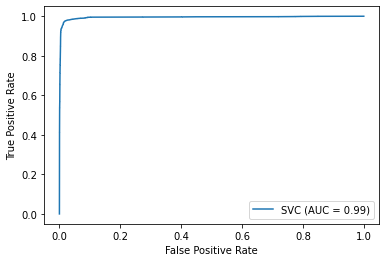

In [61]:
import matplotlib.pyplot as plt
from sklearn.metrics import plot_roc_curve
plot_roc_curve(svc_binary_PCA, X_test_binary_labels_standardized_PCA, y_test_binary_labels)
plt.show() 

### 2. Multiple labels